# In Class Notebook, Week 07

You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2023/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Maps in bqplot

In [1]:
import bqplot

In [ ]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales/axis
sc_geo = bqplot.Mercator() # not great!

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

In [3]:
# 1. data
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales/axis
sc_geo = bqplot.AlbersUSA() # not great!

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
!ls /Users/jnaiman/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## On to geopandas!

In [5]:
import geopandas

In [6]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [7]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_50908/3829038850.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))


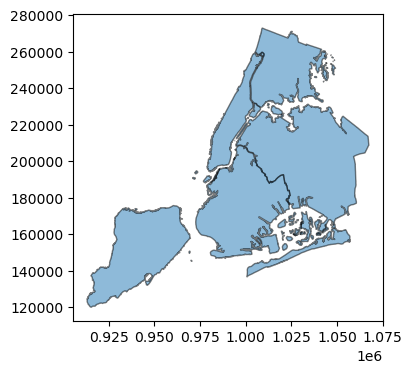

In [9]:
ax = gdf.plot(figsize=(4,4), alpha=0.5, edgecolor='k')

In [10]:
gdf_apt = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/8/query?outFields=*&where=1%3D1&f=geojson')

In [11]:
gdf_apt.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Last_Date,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,Shape.STArea(),Shape.STLength(),geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,NaN,Yes,19657.996933,929.167804,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,NaN,Yes,19735.512411,950.194217,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,NaN,Yes,13970.179208,678.398035,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,NaN,Yes,19739.423285,941.358477,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,1.193634e+12,,,Yes,Yes,NaN,Yes,13065.121447,636.744457,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [12]:
gdf_apt.describe()

,OBJECTID,UniqueID,Last_Date,Shape.STArea(),Shape.STLength()
count,2000.000000,1692.000000,9.450000e+02,2000.000000,2000.000000
mean,1028.701000,465.937943,1.206683e+12,3095.948551,239.697794
std,599.570882,337.141534,4.048941e+10,3574.642423,163.395247
min,1.000000,0.000000,1.142917e+12,237.543487,77.610507
25%,500.750000,197.000000,1.181106e+12,860.179295,134.657426
50%,1031.000000,400.000000,1.197266e+12,1969.233788,194.628600
75%,1552.250000,704.250000,1.228457e+12,4065.004867,286.078956
max,2054.000000,1221.000000,1.320210e+12,44328.436164,2021.407509


<Axes: >

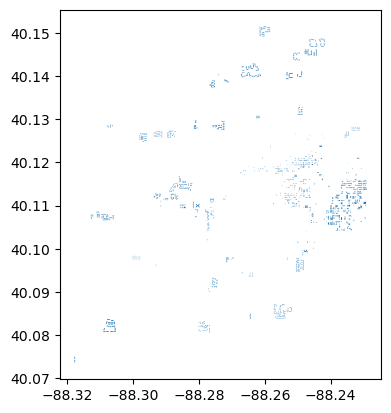

In [13]:
gdf_apt.plot()

In [14]:
gdf_ez = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/3/query?outFields=*&where=1%3D1&f=geojson')

<Axes: >

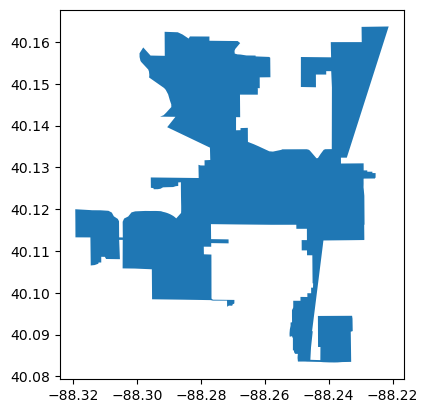

In [15]:
gdf_ez.plot()

In [16]:
gdf_ez

,OBJECTID,Ordinance,DateBegan,Expiration,Name,Comments,Shape.STArea(),Shape.STLength(),geometry
0,1,2014-207,1451628000000,1924927200000,Champaign County-City of Champaign Joint Enter...,,3.047299e+08,221082.131766,"POLYGON ((-88.22888 40.11270, -88.22888 40.112..."


In [17]:
import matplotlib.pyplot as plt

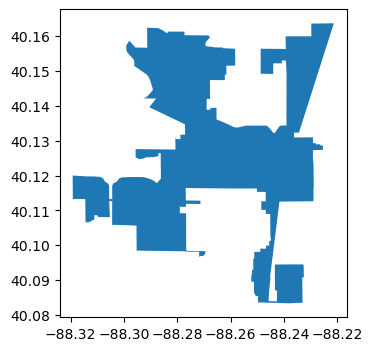

In [18]:
fig,ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax)
plt.show()

<Axes: >

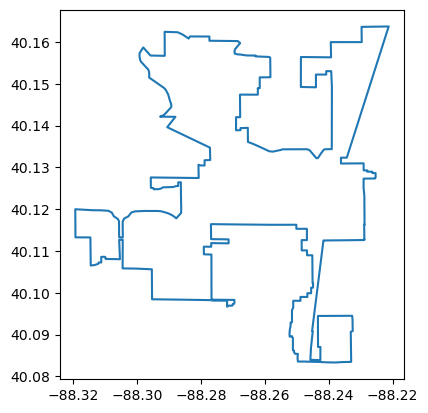

In [19]:
gdf_ez.boundary.plot()

In [21]:
gdf_ez.bounds

,minx,miny,maxx,maxy
0,-88.319273,40.083347,-88.221225,40.163721


In [22]:
gdf_ez.centroid

/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_50908/3268509221.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_ez.centroid


0    POINT (-88.26550 40.12773)
dtype: geometry

In [23]:
gdf_ez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

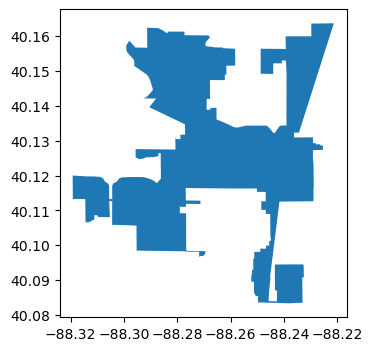

In [24]:
fig,ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax)
plt.show()

In [25]:
gdf_apt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

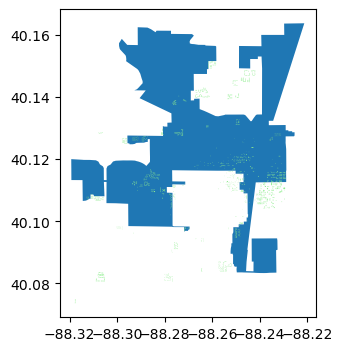

In [26]:
fig,ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax)
gdf_apt.plot(ax=ax, color='lightgreen')
plt.show()

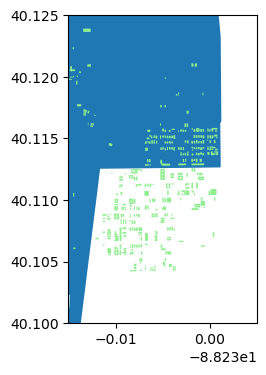

In [27]:
fig,ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax)
gdf_apt.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10,40.125)
plt.show()

In [29]:
gdf_apt.describe()

,OBJECTID,UniqueID,Last_Date,Shape.STArea(),Shape.STLength()
count,2000.000000,1692.000000,9.450000e+02,2000.000000,2000.000000
mean,1028.701000,465.937943,1.206683e+12,3095.948551,239.697794
std,599.570882,337.141534,4.048941e+10,3574.642423,163.395247
min,1.000000,0.000000,1.142917e+12,237.543487,77.610507
25%,500.750000,197.000000,1.181106e+12,860.179295,134.657426
50%,1031.000000,400.000000,1.197266e+12,1969.233788,194.628600
75%,1552.250000,704.250000,1.228457e+12,4065.004867,286.078956
max,2054.000000,1221.000000,1.320210e+12,44328.436164,2021.407509


In [31]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8'], dtype=object)

In [32]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial'], dtype=object)

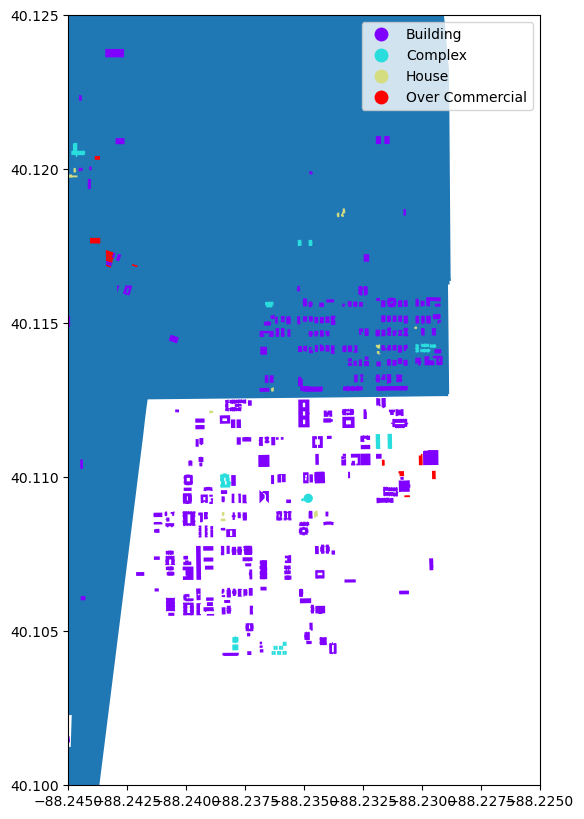

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_ez.plot(ax=ax)
#gdf_apt.plot(ax=ax, color='lightgreen')
gdf_apt.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10,40.125)
plt.show()

<Axes: >

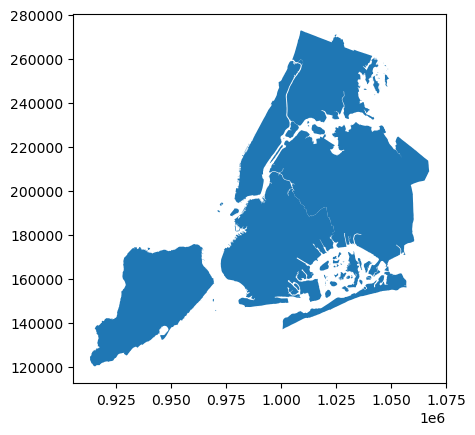

In [38]:
gdf.plot()

In [39]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
gdf = gdf.to_crs(epsg=4326)

<Axes: >

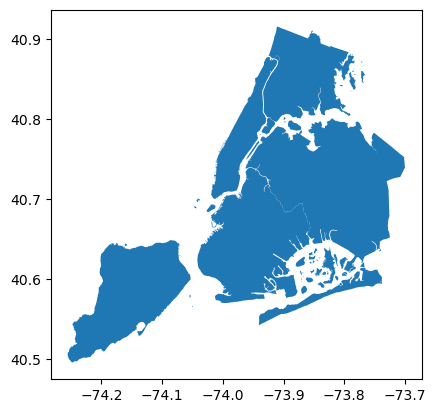

In [41]:
gdf.plot()

In [42]:
import contextily as ctx

In [43]:
gdf = gdf.to_crs(epsg=3857)

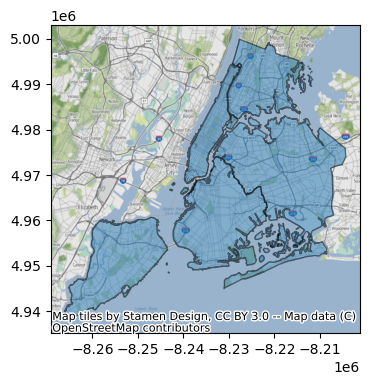

In [46]:
fig, ax= plt.subplots(figsize=(4,4))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
plt.show()

In [47]:
gdf_ez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
gdf_ez = gdf_ez.to_crs(epsg=3857)

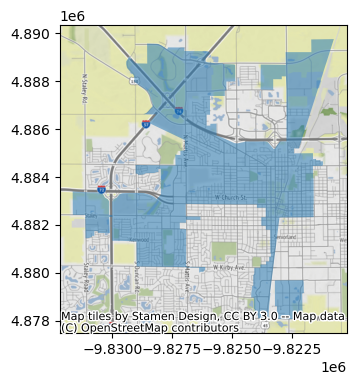

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)
plt.show()

In [50]:
gdf_ez = gdf_ez.to_crs(epsg=4326)

<Axes: >

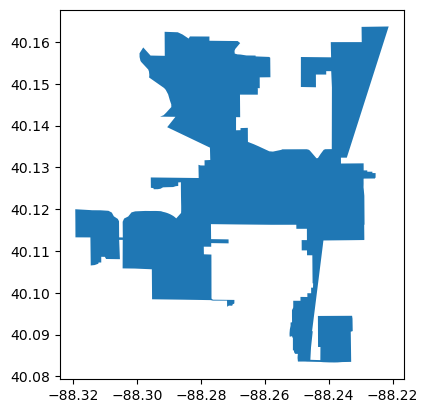

In [51]:
gdf_ez.plot()

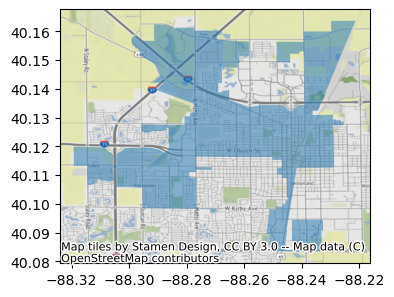

In [52]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_ez.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf_ez.crs)
plt.show()

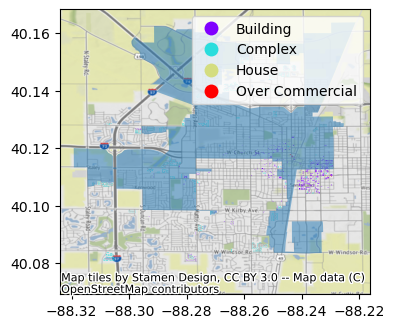

In [53]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_apt.plot(ax=ax, column='Building_Type', cmap='rainbow', legend=True)
gdf_ez.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf_ez.crs)
plt.show()

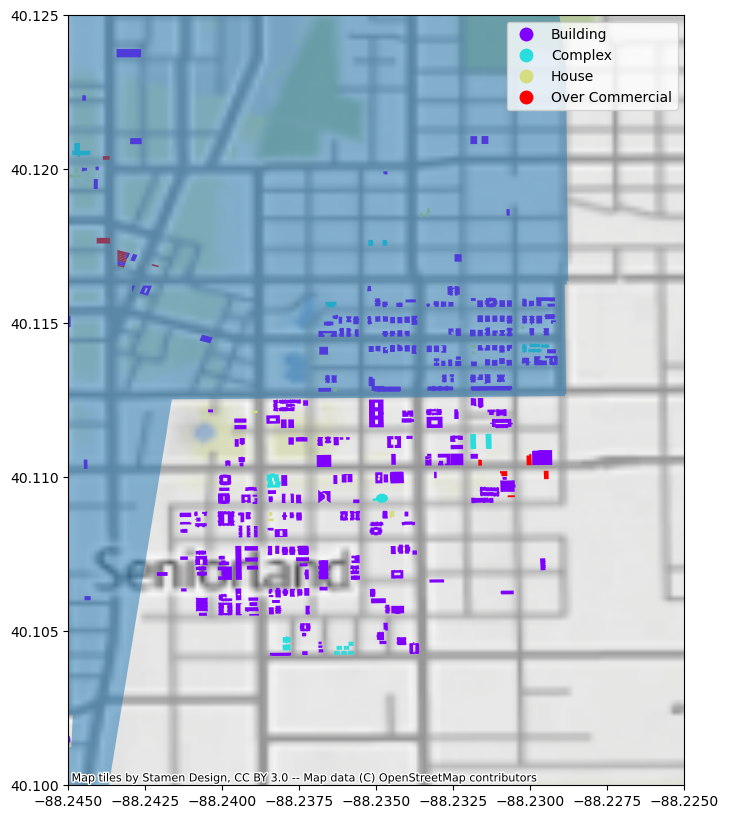

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_apt.plot(ax=ax, column='Building_Type', cmap='rainbow', legend=True)
gdf_ez.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf_ez.crs)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

ValueError: could not broadcast input array from shape (512,512,4) into shape (256,256,4)

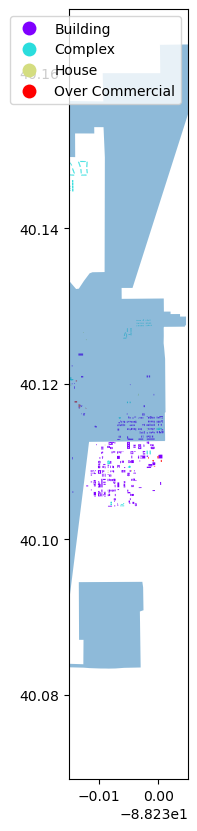

In [62]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(-88.245, -88.225)
# ax.set_ylim(40.10, 40.125)

gdf_apt.plot(ax=ax, column='Building_Type', cmap='rainbow', legend=True)
gdf_ez.plot(ax=ax, alpha=0.5)

ctx.add_basemap(ax=ax, crs=gdf_apt.crs)

plt.show()

In [57]:
gdf_ez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
gdf_apt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich